<img src="img/dsci513_header2.png" width="600">

# Lab 4: MongoDB query language

Total out of 27 marks.

## Instructions
---
rubric={mechanics:2}

- Follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/)

- You submit 3 files to Gradescope (***upload it separately, not as a zip file, or folder***)
    - Fully rendered ipynb notebook, 
    - HTML of the fully rendered ipynb notebook
    - PDF of the fully rendered ipynb notebook

- Add a link to your GitHub repository here: https://github.ubc.ca/mds-2024-25/DSCI_513_lab4_lingsong

> NOTE: There is no autograding for any of our labs. So, the idea of Gradescope is just to upload the 3 files listed above. You just need to make sure that it is uploaded. You must upload 3 files individually to Gradescope (not in a folder or a zipped folder).

## Getting set up
---

Before running the following cell, make sure that you have the correct login information in the `credentials_mongodb.json` file:

> You should be careful where your credentials file is `credentials_mongodb.json`. Revise concepts on absolute path and relative path. 

> Please refer to the lecture notes for information on setting up your MongoDB and uploading dumps. [Here is the link.](https://pages.github.ubc.ca/MDS-2024-25/DSCI_513_database-data-retr_instructors/theme/Mongodb_installation.html)


> In this week's lab, a .gitignore file has been added. If you don’t see a credentials_mongodb.json file in the student/data directory, please create one with the following content:
{
  "host": "<cluster0.<clustername>.mongodb.net>",
  "port": <MongodbPort>,
  "username": "<MongodbUsername>",
  "password": "<MongodbPassword>"
}

> Make sure to replace <clustername>, <MongodbPort>, <MongodbUsername>, and <MongodbPassword> with the appropriate values for your MongoDB setup.

In [24]:
from pymongo import MongoClient
import json
import urllib.parse

with open('data/credentials_mongodb.json') as f:
    login = json.load(f)

username = login['username']
password = urllib.parse.quote(login['password'])
host = login['host']
url = "mongodb+srv://{}:{}@{}/?retryWrites=true&w=majority".format(username, password, host)
client = MongoClient(url)

## Exercise 1: Getting to know your MongoDB databases
---

### 1.1

rubric={accuracy:1}

List the databases that exist on your MongoDB Atlas cluster after loading sample databases. You can do this either by checking out the databases using Compass or by using `pymongo`'s `.list_database_names()` method.

In [2]:
client.list_database_names()

['sample_airbnb',
 'sample_analytics',
 'sample_geospatial',
 'sample_guides',
 'sample_mflix',
 'sample_restaurants',
 'sample_supplies',
 'sample_training',
 'sample_weatherdata',
 'admin',
 'local']

### 1.2

rubric={accuracy:1}

List the collections stored in the `sample_mflix` and `sample_airbnb` databases. You can do this either by checking out the databases using Compass or by using `pymongo`'s `.list_collection_names()` method.

In [4]:
client.sample_mflix.list_collection_names()

['movies', 'embedded_movies', 'comments', 'sessions', 'theaters', 'users']

In [5]:
client.sample_airbnb.list_collection_names()

['listingsAndReviews']

### 1.3

rubric={accuracy:2}

We would like to create a summary report to get the number of documents in each collection of each database on our cluster. Write a python loop that produces an output similar to the following:

```
Database: sample_airbnb
(collection, n_docs) =  ('listingsAndReviews', 5555)

Database: sample_analytics
(collection, n_docs) =  ('transactions', 1746)
(collection, n_docs) =  ('accounts', 1746)
(collection, n_docs) =  ('customers', 500)
.
.
.
```

In previous questions, you've been introduced to the two methods of `pymongo` which are used to return database and collection names. Moreover, you can use the `.count_documents(filter={}))` method to count all documents in each collection.

In [8]:
# List all databases
databases = client.list_database_names()

# Iterate over each database
for db_name in databases:
    db = client[db_name]
    print(f"Database: {db_name}")
    
    # List all collections in the current database
    collections = db.list_collection_names()
    
    # Iterate over each collection and count documents
    for collection_name in collections:
        collection = db[collection_name]
        n_docs = collection.count_documents({})
        print(f"(collection, n_docs) = ('{collection_name}', {n_docs})")

    print('\n') # Line break between db

Database: sample_airbnb
(collection, n_docs) = ('listingsAndReviews', 5555)


Database: sample_analytics
(collection, n_docs) = ('customers', 500)
(collection, n_docs) = ('accounts', 1746)
(collection, n_docs) = ('transactions', 1746)


Database: sample_geospatial
(collection, n_docs) = ('shipwrecks', 11095)


Database: sample_guides
(collection, n_docs) = ('planets', 8)


Database: sample_mflix
(collection, n_docs) = ('movies', 21349)
(collection, n_docs) = ('embedded_movies', 3483)
(collection, n_docs) = ('comments', 41079)
(collection, n_docs) = ('sessions', 1)
(collection, n_docs) = ('theaters', 1564)
(collection, n_docs) = ('users', 185)


Database: sample_restaurants
(collection, n_docs) = ('restaurants', 25359)
(collection, n_docs) = ('neighborhoods', 195)


Database: sample_supplies
(collection, n_docs) = ('sales', 5000)


Database: sample_training
(collection, n_docs) = ('posts', 500)
(collection, n_docs) = ('trips', 10000)
(collection, n_docs) = ('companies', 9500)
(collectio

### 1.4

rubric={accuracy:1}

The _Schema_ tab of the Compass application provides a nice schema analyzer tool that helps to quickly obtain summary information about collections in a database both visually and in text format.

Suppose that we would like to find out how high-rated movies on _metacritic_ are rated on IMDB. Use the schema analyzer tool to find the distribution of the `imdb.rating` field for movies in the `sample_mflix` database that have a metacritic rating of greater than 90. Paste a screenshot of the distribution that you find here.

**Hint:** There are 111 documents with a metacritic rating of greater than 90.

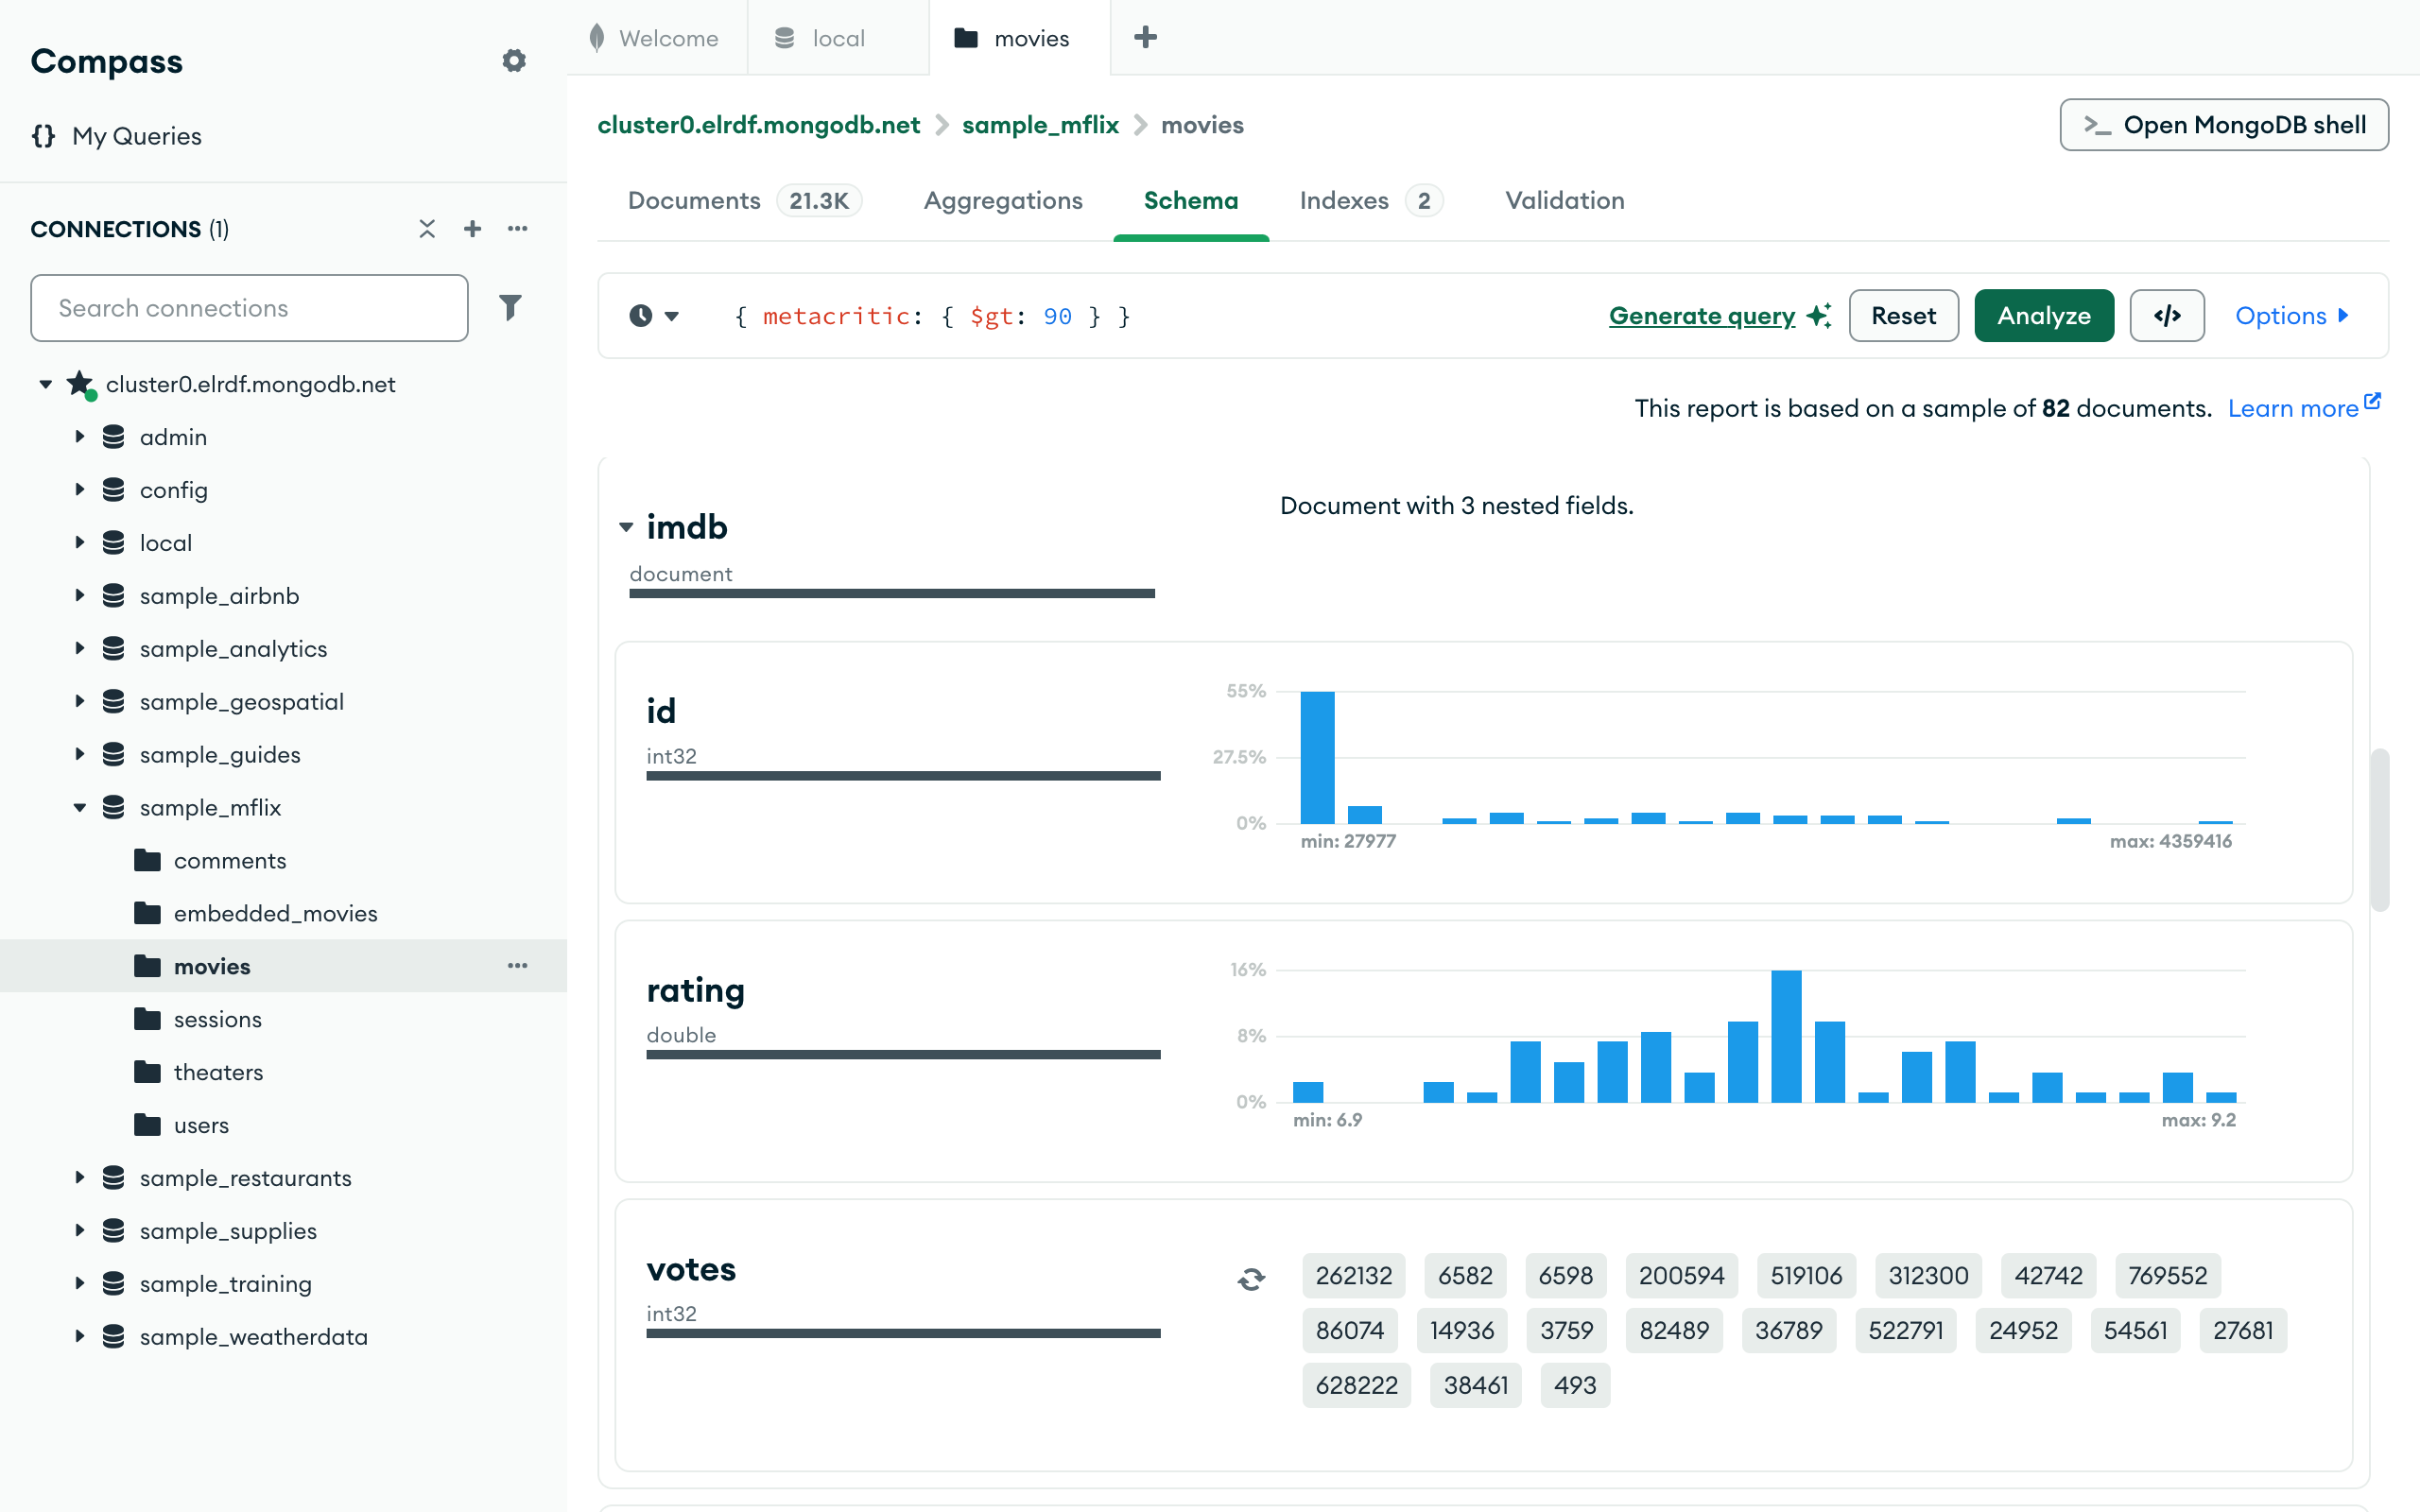

## Exercise 2: Basic MongoDB queries
---

### 2.1

rubric={accuracy:1}

Retrieve one (random) document associated with a movie produced in 2015.

You can use `.find_one()` method to do this, or use `.find()` but limit your results to 1 document.

In [10]:
db = client.sample_mflix

query = {'year': 2015}
movie = db.movies.find_one(query)

movie

{'_id': ObjectId('573a13adf29313caabd2b765'),
 'plot': "A new theme park is built on the original site of Jurassic Park. Everything is going well until the park's newest attraction--a genetically modified giant stealth killing machine--escapes containment and goes on a killing spree.",
 'genres': ['Action', 'Adventure', 'Sci-Fi'],
 'runtime': 124,
 'metacritic': 59,
 'rated': 'PG-13',
 'cast': ['Chris Pratt',
  'Bryce Dallas Howard',
  'Irrfan Khan',
  "Vincent D'Onofrio"],
 'num_mflix_comments': 0,
 'poster': 'https://m.media-amazon.com/images/M/MV5BNzQ3OTY4NjAtNzM5OS00N2ZhLWJlOWUtYzYwZjNmOWRiMzcyXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SY1000_SX677_AL_.jpg',
 'title': 'Jurassic World',
 'fullplot': '22 years after the original Jurassic Park failed, the new park (also known as Jurassic World) is open for business. After years of studying genetics the scientists on the park genetically engineer a new breed of dinosaur. When everything goes horribly wrong, will our heroes make it off the island

### 2.2

rubric={accuracy:1}

Retrieve all TV series produced in 1995.

> **Hint:** Inspect possible values for the `type` field.

In [21]:
query = {'year': 1995, 'type': 'series'}
tv_series_1995 = db.movies.find(query)

for series in tv_series_1995:
    print('Title:', series['title'])

Title: Streets of Laredo
Title: The Langoliers
Title: Pride and Prejudice


### 2.3

rubric={accuracy:2}

Retrieve the title and cast of movies produced in 2010, but limit your results to 5 documents.

> **Note:** Don't forget to exclude the `_id` field from your returned documents.

> **Note:** The exact returned documents returned by `pymongo` might be different in different sessions and on different computers. This is perfectly fine.

In [20]:
query = {'year': 2010}
projection = {'_id': 0, 'title': 1, 'cast': 1}
movies_2010 = db.movies.find(query, projection).limit(5)

for movie in movies_2010:
    print('Title:', movie['title'])
    print('Cast:', movie['cast'], '\n')

Title: Pèl Adrienn
Cast: ['èva Gèbor', 'Istvèn Znamenèk', 'èkos Horvèth', 'Lia Pokorny'] 

Title: In My Sleep
Cast: ['Philip Winchester', 'Tim Draxl', 'Lacey Chabert', 'Abigail Spencer'] 

Title: The Pacific
Cast: ['James Badge Dale', 'Joseph Mazzello', 'Jon Seda', 'Sebastian Bertoli'] 

Title: Tangled
Cast: ['Mandy Moore', 'Zachary Levi', 'Donna Murphy', 'Ron Perlman'] 

Title: Utomlyonnye solntsem 2: Predstoyanie
Cast: ['Nikita Mikhalkov', 'Oleg Menshikov', 'Nadezhda Mikhalkova', 'Sergey Makovetskiy'] 



### 2.4

rubric={accuracy:2}

Retrieve the top 15 movies produced in 2010 that have the longest duration. Exclude TV series from your results. The returned documents should only contain the `title` and `runtime` fields (exclude the `_id` field).

> **Note:** It's ok if your results contain duplicate movies.

In [22]:
query = {'year': 2010, 'type': {'$ne': 'series'}}
projection = {'_id': 0, 'title': 1, 'runtime': 1}
movies_2010 = db.movies.find(query, projection).sort('runtime', -1).limit(15)

for movie in movies_2010:
    print('Title:', movie['title'])
    print('Runtime:', movie['runtime'], '\n')

Title: Mysteries of Lisbon
Runtime: 272 

Title: Utomlyonnye solntsem 2: Predstoyanie
Runtime: 181 

Title: Aurora
Runtime: 181 

Title: Thorne: Sleepyhead
Runtime: 180 

Title: The Autobiography of Nicolae Ceausescu
Runtime: 180 

Title: Riverworld
Runtime: 178 

Title: Enthiran
Runtime: 174 

Title: Khaleja
Runtime: 170 

Title: We Believed
Runtime: 170 

Title: My Name Is Khan
Runtime: 165 

Title: Moss
Runtime: 163 

Title: Raajneeti
Runtime: 163 

Title: Singam
Runtime: 160 

Title: Black Venus
Runtime: 159 

Title: Will You Cross the Skies for Me?
Runtime: 157 



### 2.5

rubric={accuracy:2}

For year 2015, return the number of movies with a metacritic rating of exactly 90.

In [25]:
query = {'year': 2015, 'metacritic': 90}
count = db.movies.count_documents(query)

count

3

### 2.6

rubric={accuracy:2}

Retrieve the title and runtime of the 10 shortest movies in the `movies` collection.

For this exercise, you need to make sure that the field `runtime` exists in the returned documents, otherwise by default those documents would appear first which don't have a `runtime` field at all!

> **Hint:** You need the `$exists` operator (see [here](https://docs.mongodb.com/manual/reference/operator/query/exists/) for help).

In [29]:
query = {'runtime': {'$exists': True}}
projection = {'_id': 0, 'title': 1, 'runtime': 1}
shortest_movies = db.movies.find(query, projection).sort('runtime', 1).limit(10)

for movie in shortest_movies:
    print(movie)

{'runtime': 1, 'title': 'Neko no shukai'}
{'runtime': 1, 'title': 'The Kiss'}
{'runtime': 1, 'title': 'The Kiss'}
{'runtime': 2, 'title': 'Fresh Guacamole'}
{'runtime': 2, 'title': 'Pixels'}
{'runtime': 2, 'title': 'Game Over'}
{'runtime': 2, 'title': 'Andrè and Wally B.'}
{'runtime': 2, 'title': 'Luxo Jr.'}
{'runtime': 3, 'title': 'Sisyphus'}
{'runtime': 3, 'title': 'Gagarin'}


## Exercise 3: Conditionals, embedded documents & arrays
---

### 3.1

rubric={accuracy:2}

Retrieve the title, production year, and number of awards of all movies that

- have been produced between 1950 and 2000 (inclusive)
- have an IMDB rating of 8.5 or better
- won at least 30 awards.

Sort the results by production year in descending order.

In [27]:
query = {
    'year': {'$gte': 1950, '$lte': 2000},
    'imdb.rating': {'$gte': 8.5},
    'awards.wins': {'$gte': 30}
}
projection = {'_id': 0, 'title': 1, 'year': 1, 'awards.wins': 1}
movies = db.movies.find(query, projection).sort('year', -1)

for movie in movies:
    print(movie)

{'year': 2000, 'title': 'Memento', 'awards': {'wins': 54}}
{'year': 2000, 'title': 'Gladiator', 'awards': {'wins': 63}}
{'year': 1999, 'title': 'The Matrix', 'awards': {'wins': 37}}
{'year': 1998, 'title': 'Saving Private Ryan', 'awards': {'wins': 83}}
{'title': 'Life Is Beautiful', 'awards': {'wins': 66}, 'year': 1997}
{'year': 1997, 'title': 'Life Is Beautiful', 'awards': {'wins': 66}}
{'year': 1995, 'title': 'The Usual Suspects', 'awards': {'wins': 36}}
{'year': 1995, 'title': 'Se7en', 'awards': {'wins': 32}}
{'year': 1994, 'title': 'Pulp Fiction', 'awards': {'wins': 64}}
{'year': 1994, 'title': 'Forrest Gump', 'awards': {'wins': 46}}
{'title': "Schindler's List", 'awards': {'wins': 81}, 'year': 1993}
{'year': 1991, 'title': 'The Silence of the Lambs', 'awards': {'wins': 56}}
{'year': 1990, 'title': 'Goodfellas', 'awards': {'wins': 43}}
{'year': 1981, 'title': 'Raiders of the Lost Ark', 'awards': {'wins': 32}}
{'year': 1977, 'title': 'Star Wars: Episode IV - A New Hope', 'awards': {

### 3.2

rubric={accuracy:2}

Find the top 15 highest-rated movies according to IMDB for movies that have at least 100,000 votes. Your returned documents should only contain the `title`, `year`, and `imdb.rating` fields.

> **Hint:** Be careful about documents which have a blank space in their `imdb.rating` field!

> **Note:** It's ok if your results contain duplicates. Return 15 documents in any case.

In [30]:
query = {
    'imdb.votes': {'$gte': 100000}, 
    'imdb.rating': {'$exists': True, '$ne': ''}
}
projection = {'_id': 0, 'title': 1, 'year': 1, 'imdb.rating': 1}
top_movies = db.movies.find(query, projection).sort('imdb.rating', -1).limit(15)

for movie in top_movies: 
    print(movie)

{'title': 'Band of Brothers', 'year': 2001, 'imdb': {'rating': 9.6}}
{'imdb': {'rating': 9.3}, 'year': 1994, 'title': 'The Shawshank Redemption'}
{'imdb': {'rating': 9.3}, 'year': 1994, 'title': 'The Shawshank Redemption'}
{'imdb': {'rating': 9.2}, 'year': 1972, 'title': 'The Godfather'}
{'imdb': {'rating': 9.1}, 'year': 1974, 'title': 'The Godfather: Part II'}
{'imdb': {'rating': 9.0}, 'year': 2008, 'title': 'The Dark Knight'}
{'imdb': {'rating': 8.9}, 'year': 1999, 'title': 'Fight Club'}
{'imdb': {'rating': 8.9}, 'year': 1994, 'title': 'Pulp Fiction'}
{'imdb': {'rating': 8.9}, 'year': 2003, 'title': 'The Lord of the Rings: The Return of the King'}
{'title': "Schindler's List", 'year': 1993, 'imdb': {'rating': 8.9}}
{'imdb': {'rating': 8.8}, 'year': 1980, 'title': 'Star Wars: Episode V - The Empire Strikes Back'}
{'imdb': {'rating': 8.8}, 'year': 2001, 'title': 'The Lord of the Rings: The Fellowship of the Ring'}
{'imdb': {'rating': 8.8}, 'year': 2010, 'title': 'Inception'}
{'imdb': {

### 3.3

rubric={accuracy:1}

Retrieve the title, production year, and IMDB rating of movies in which both **Morgan Freeman** and **Clint Eastwood** played a role (among other actors in those movies). Sort the returned documents by year in descending order.

In [31]:
query = {'cast': {'$all': ['Morgan Freeman', 'Clint Eastwood']}}
projection = {'_id': 0, 'title': 1, 'year': 1, 'imdb.rating': 1}
movies = db.movies.find(query, projection).sort('year', -1)

for movie in movies: 
    print(movie)

{'imdb': {'rating': 8.1}, 'year': 2004, 'title': 'Million Dollar Baby'}
{'imdb': {'rating': 8.3}, 'year': 1992, 'title': 'Unforgiven'}


### 3.4

rubric={accuracy:3}

Retrieve documents associated with movies which:

- are available in both German and French (among other languages), but not in English,
- are either rated above 8 according to IMDB, or above 7.5 according to the critic ratings of [Rotten Tomatoes](https://www.rottentomatoes.com/) (inspect the `tomatoes` field),
- have at least 50 Rotten Tomatoes critic reviews.

The returned documents should include the title, year, IMDB rating, Rotten Tomatoes critic rating and country of production fields. Sort the results by IMDB rating in descending order.

**Note:** Duplicates in the results are ok.

In [32]:
query = {
    'languages': {'$all': ['German', 'French'], '$nin': ['English']},
    '$or': [
        {'imdb.rating': {'$gt': 8}}, 
        {'tomatoes.critic.rating': {'$gt': 7.5}}
    ], 
    'tomatoes.critic.numReviews': {'$gte': 50}
}
projection = {
    '_id': 0, 
    'title': 1, 
    'year': 1, 
    'imdb.rating': 1, 
    'tomatoes.critic.rating': 1, 
    'countries': 1
}
movies = db.movies.find(query, projection).sort('imdb.rating', -1)

for movie in movies: 
    print(movie)

{'imdb': {'rating': 7.8}, 'year': 2013, 'title': 'The Wind Rises', 'tomatoes': {'critic': {'rating': 7.9}}, 'countries': ['Japan']}
{'title': 'The Wind Rises', 'year': 2013, 'imdb': {'rating': 7.8}, 'countries': ['Japan'], 'tomatoes': {'critic': {'rating': 7.9}}}


### 3.5

rubric={accuracy:2}

Find the title and production year of the top 20 award-winning movies which have **not** been produced in USA, Canada, UK, or Australia.

**Note:** Duplicates are ok. Return 20 documents in any case.

In [33]:
query = {
    'countries': {'$nin': ['USA', 'Canada', 'UK', 'Australia']}, 
    'awards.wins': {'$exists': True, '$ne': ''}
}
projection = {'_id': 0, 'title': 1, 'year': 1}
movies = db.movies.find(query, projection).sort('awards.wins', -1).limit(20)

for movie in movies: 
    print(movie)

{'title': 'The Artist', 'year': 2011}
{'title': 'Amour', 'year': 2012}
{'title': 'Amour', 'year': 2012}
{'title': 'A Separation', 'year': 2011}
{'year': 2006, 'title': 'The Lives of Others'}
{'title': 'Let the Right One In', 'year': 2008}
{'year': 2002, 'title': 'City of God'}
{'year': 2006, 'title': 'Volver'}
{'title': 'Life Is Beautiful', 'year': 1997}
{'title': 'The Sea Inside', 'year': 2004}
{'year': 1997, 'title': 'Life Is Beautiful'}
{'year': 2009, 'title': 'The White Ribbon'}
{'year': 2001, 'title': 'Amèlie'}
{'year': 2000, 'title': 'Amores Perros'}
{'title': 'Shall We Dance?', 'year': 1996}
{'title': 'Shall We Dance?', 'year': 1996}
{'year': 2013, 'title': 'The Grandmaster'}
{'year': 1999, 'title': 'All About My Mother'}
{'year': 2001, 'title': 'Spirited Away'}
{'year': 2009, 'title': 'The Secret in Their Eyes'}


### The end

<img src="img/nosql_cartoon.jpeg" width="500">

([image source](https://www.deviantart.com/harshadpd/art/Relational-Issues-719533744))

<img src="img/thanks.png" width="500">
<img src="img/andy.JPG" width="300">